In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [85]:
wally = cv.imread('./wally_2_cropped.jpg')
wally_display = cv.cvtColor(wally, cv.COLOR_BGR2RGB)

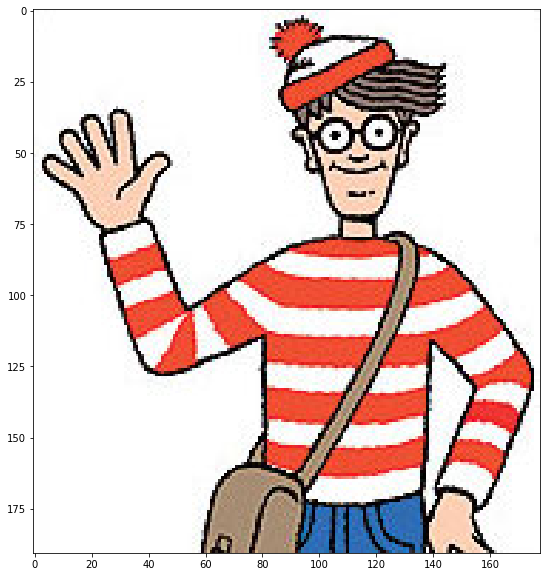

In [86]:
plt.figure(figsize=(20, 10))
plt.imshow(wally_display)
plt.show()

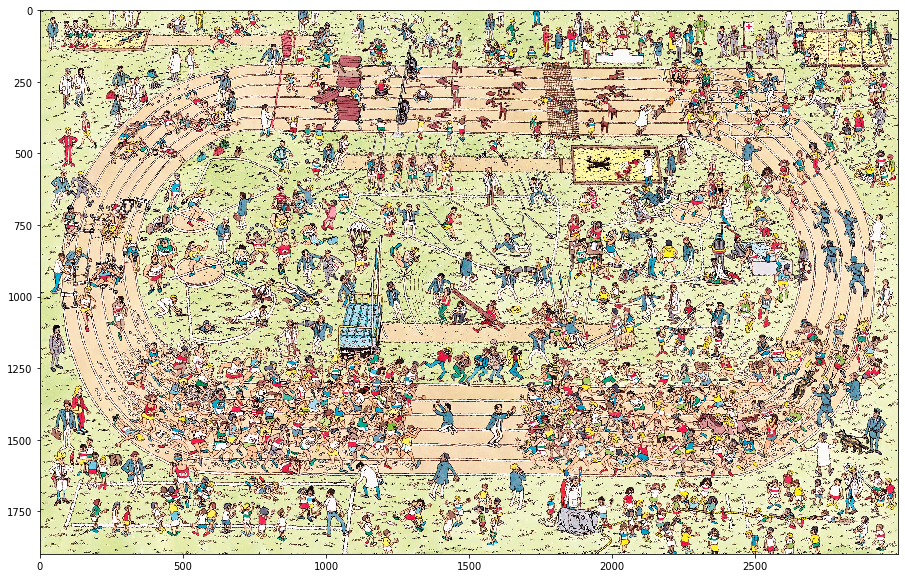

In [87]:
where_wally = cv.imread('./wheres_wally_1.jpg')
where_wally_display = cv.cvtColor(where_wally, cv.COLOR_BGR2RGB)

plt.figure(figsize=(20, 10))
plt.imshow(where_wally_display)
plt.show()

In [88]:
orb = cv.ORB_create(100, scaleFactor=2, nlevels=8)

wally_gray = cv.cvtColor(wally, cv.COLOR_BGR2GRAY)

keypoints, descriptors = orb.detectAndCompute(wally_gray, None)

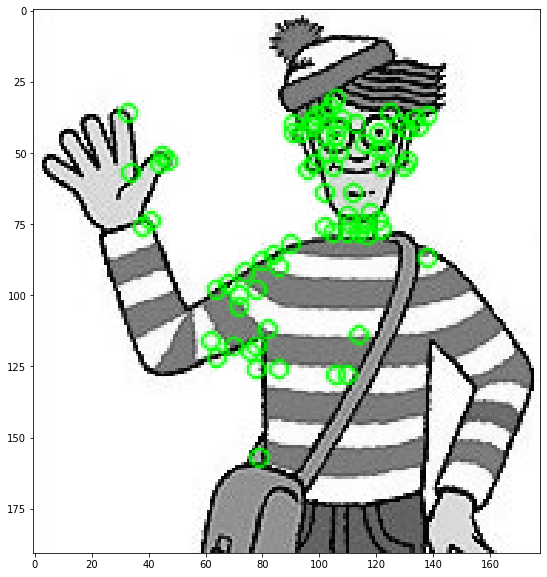

In [89]:
wally_display_keypoints = cv.drawKeypoints(wally_gray, keypoints, 
                                           wally_gray, color=(0,255,0),
                                           flags=0)

plt.figure(figsize=(20, 10))
plt.imshow(wally_display_keypoints)
plt.show()

In [90]:
where_wally_gray = cv.cvtColor(where_wally, cv.COLOR_BGR2GRAY)

keypoints2, descriptors2 = orb.detectAndCompute(where_wally_gray, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(descriptors, descriptors2)

# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x:x.distance)

len(matches)

29

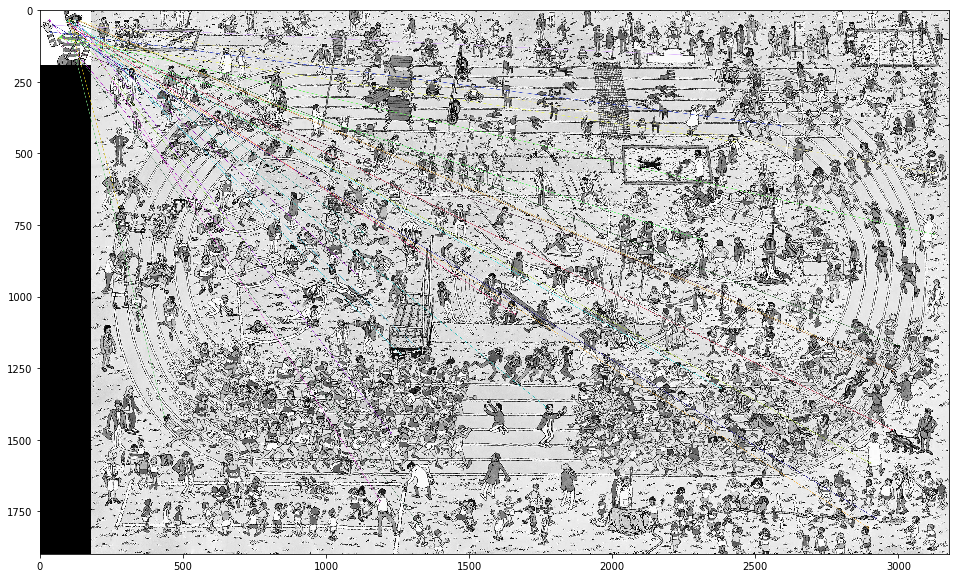

In [92]:
matches_map = cv.drawMatches(wally_gray, keypoints,
                             where_wally_gray, keypoints2,
                             matches, where_wally, flags=2)

cv.imwrite('res4.jpg', matches_map)

plt.figure(figsize=(20, 10))
plt.imshow(matches_map)
plt.show()

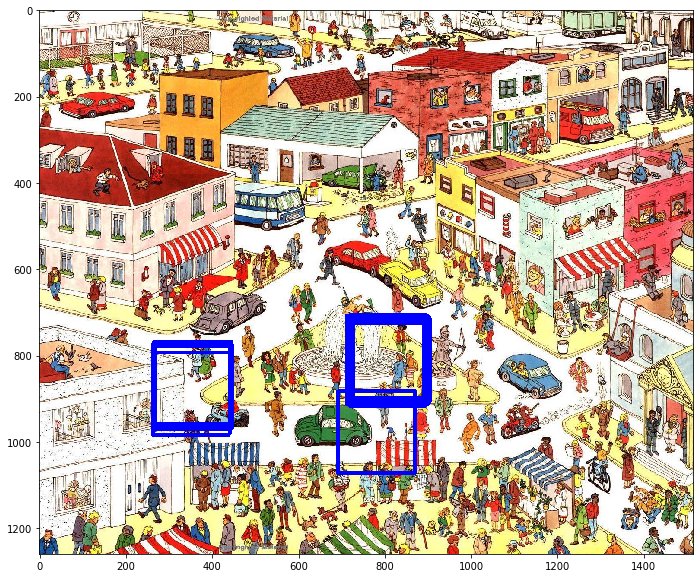

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_bgr = cv2.imread('./wheres_wally_2.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

template = cv2.imread('./wally_2_cropped.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.22
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

plt.figure(figsize=(20, 10))
plt.imshow(img_rgb)
plt.show()

In [18]:
cv.imwrite('res7.jpg', img_rgb)

True